In [1]:
import sys

In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
import os
os.getcwd()

'/groups/tanaka/People/current/jiwang/projects/RA_competence/scripts'

In [5]:
data_seuratObj = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/RNAmatrix_umap_alevin.spliced_unspliced_v3.h5ad"
adata = sc.read_h5ad(data_seuratObj, chunk_size=6000)

In [6]:
adata

AnnData object with n_obs × n_vars = 43187 × 15141
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'

In [7]:
adata.layers.keys()

KeysView(Layers with keys: spliced, unspliced)

In [8]:
adata.obs['condition']= adata.obs['condition'].astype('category') # change the condition into category type

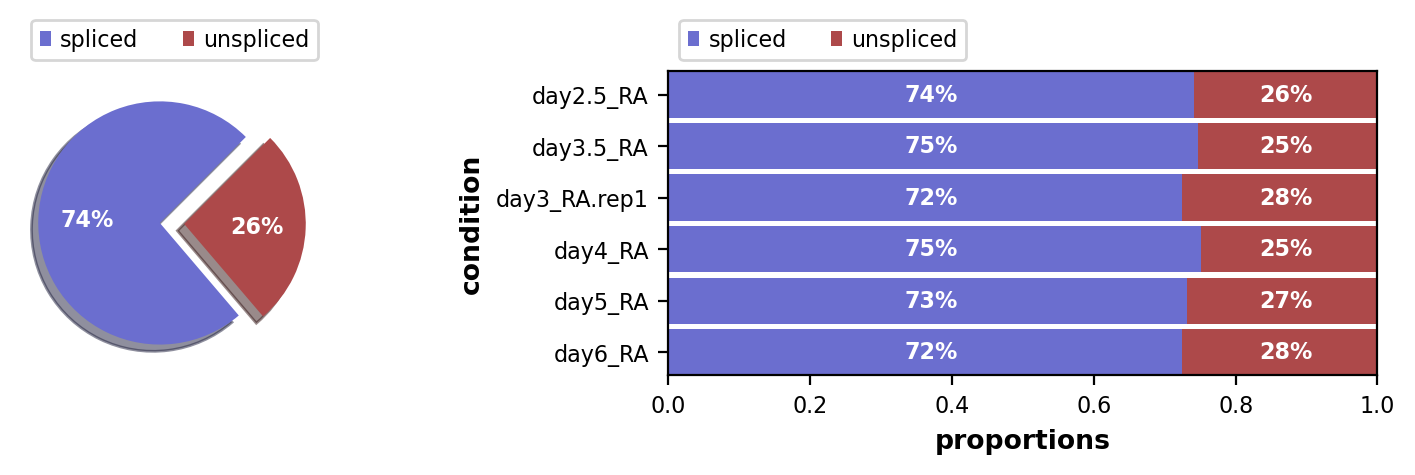

In [9]:
#adata = cr.datasets.pancreas()

scv.pl.proportions(adata, groupby='condition')


In [10]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)


Filtered out 2978 genes that are detected 20 counts (shared).
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:16) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [11]:
scv.tl.recover_dynamics(adata, n_jobs=16) # slow step and require high memory ~120G, so it is better to start the jupterlab with 150G RAM (~15-20mins)

recovering dynamics (using 16/76 cores)


  0%|          | 0/1145 [00:00<?, ?gene/s]

    finished (0:18:46) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
adata 

AnnData object with n_obs × n_vars = 43187 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling'
    uns: 'pca', 'neighbors', 'recover_dynamics'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_'


In [13]:
# save the velocity result
adata.write('../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/my_results_velocity_recover.dynamics.h5ad', compression="gzip")

In [14]:
# reload the calculated velocity from tl.recover_dynamics
# adata = sc.read_h5ad('../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/my_results_velocity_recover.dynamics.h5ad', chunk_size=6000)

In [15]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:01:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/76 cores)


  0%|          | 0/43187 [00:00<?, ?cells/s]

    finished (0:03:39) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [22]:
adata

AnnData object with n_obs × n_vars = 43187 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'neighbors', 'pca', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'condition_colors'
    ob

In [23]:
adata.obs['celltypes']= adata.obs['celltypes'].astype('category') # change the condition into category type

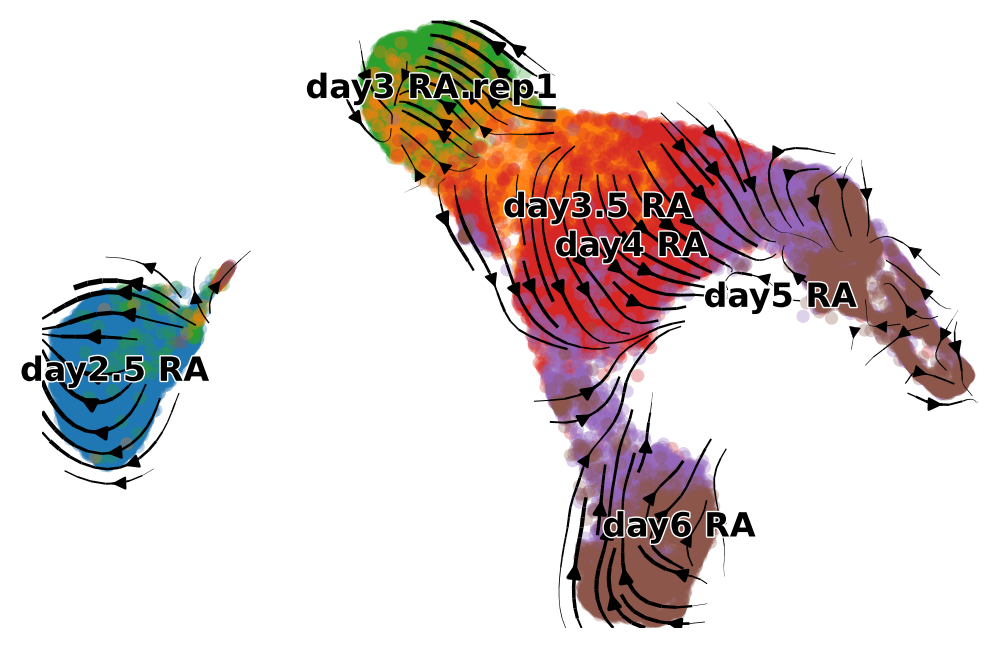

In [19]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=0.5,
    legend_fontsize=12, title="", color = "condition"
)

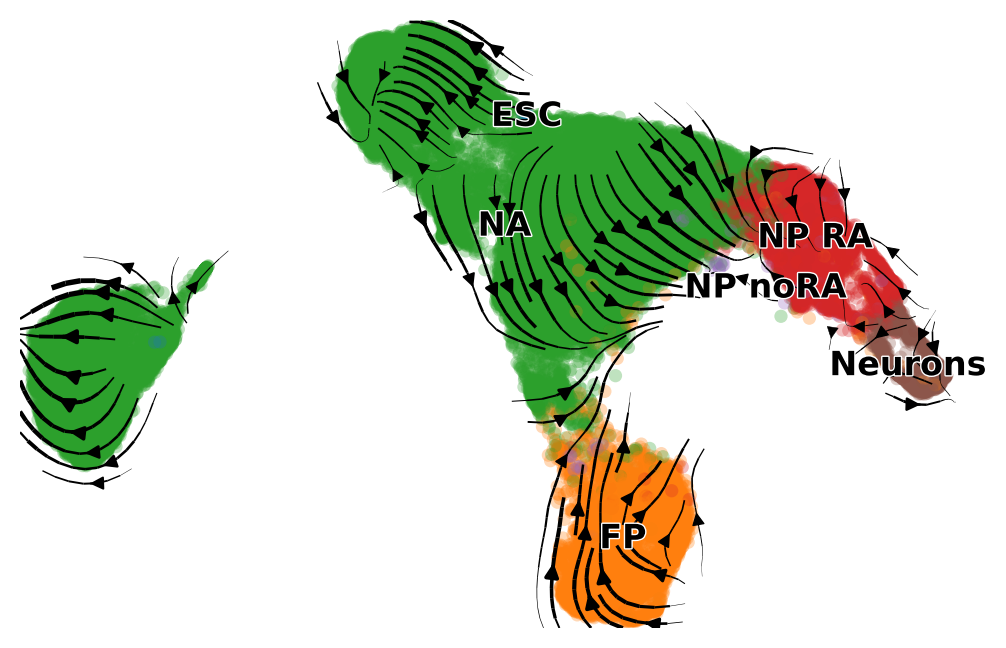

In [25]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=0.5,
    legend_fontsize=12, title="", color = "celltypes"
)

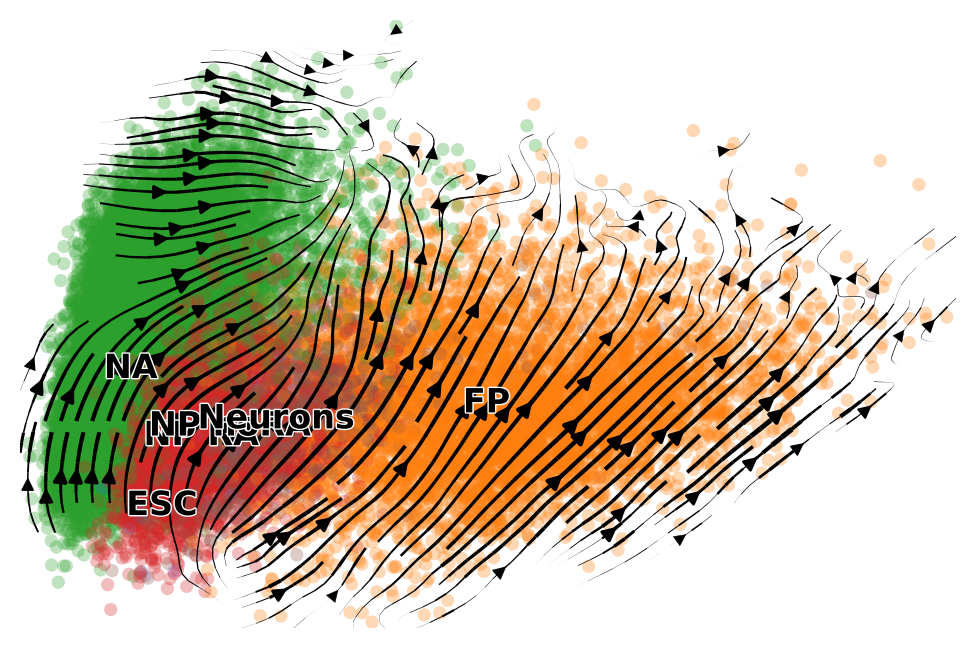

In [24]:
scv.pl.velocity_embedding_stream(
    adata, basis="pca", smooth=0.5, min_mass=0.5,
    legend_fontsize=12, title="", color = "celltypes"
)

In [29]:
print(adata.var.velocity_genes.sum()) # check the genes used for RNA velocity

935


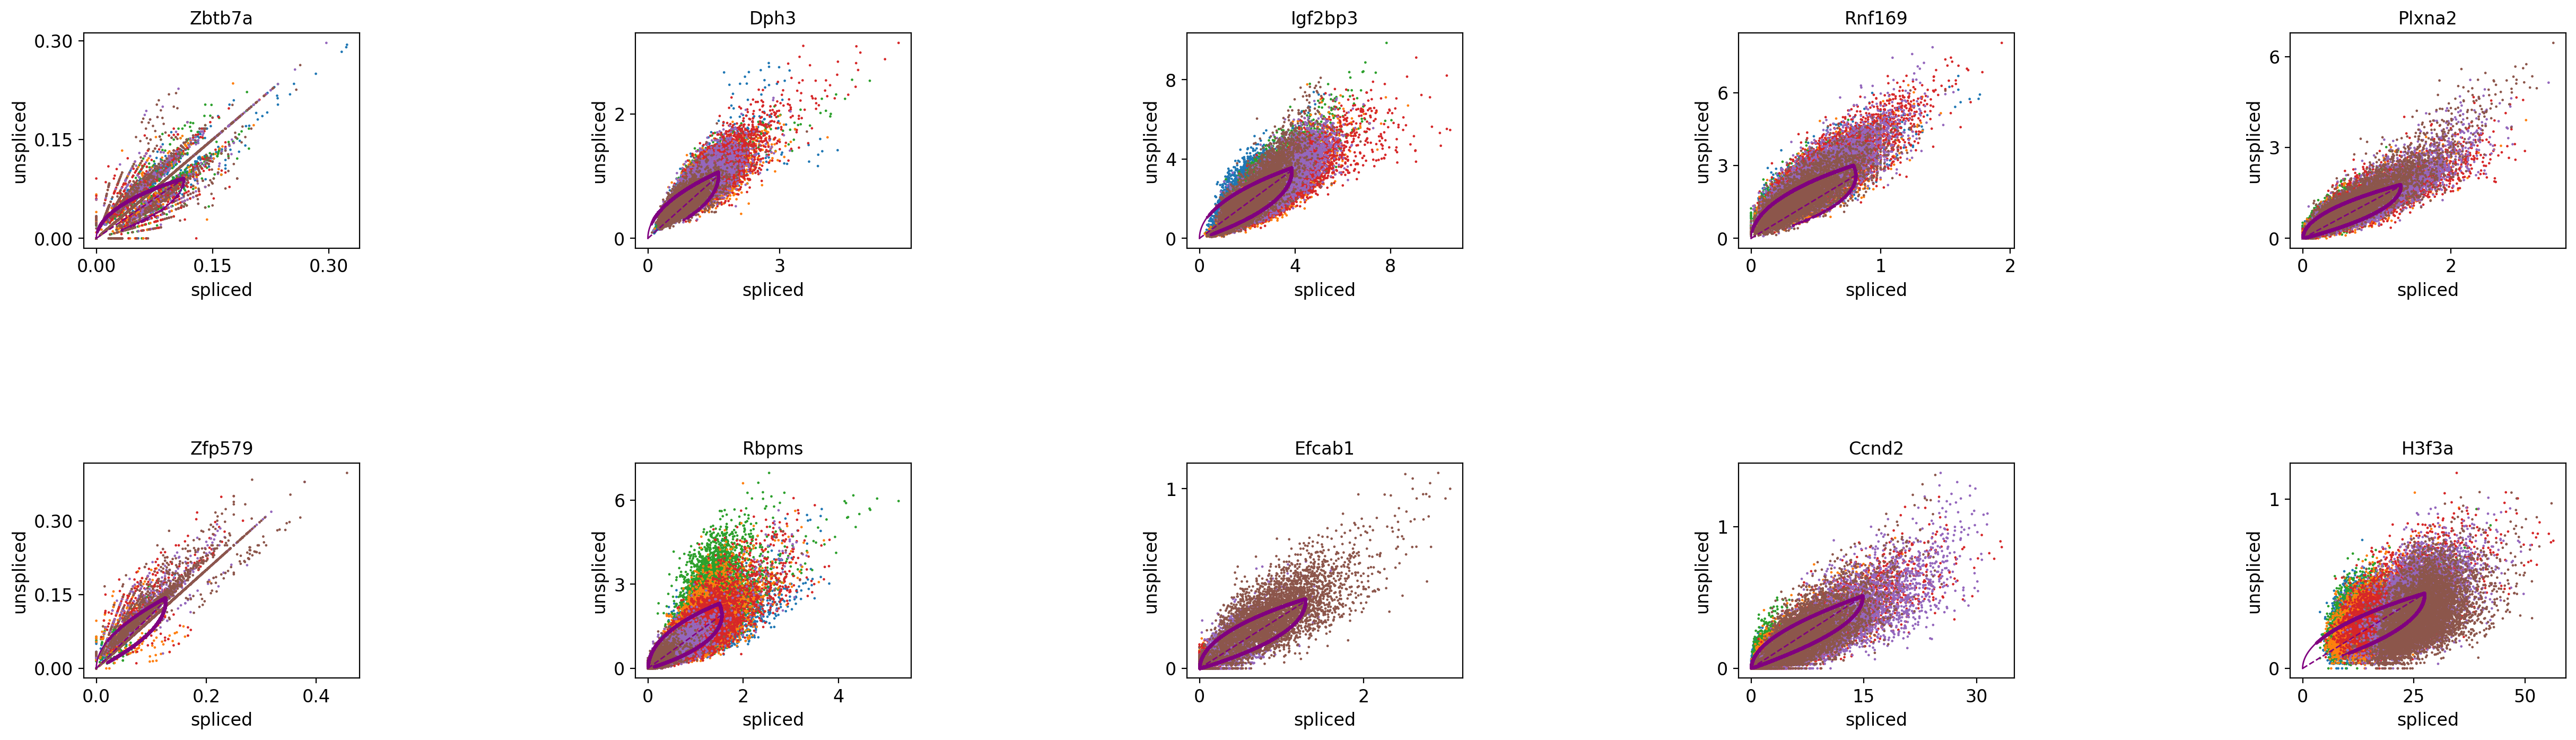

In [31]:
## top genes
top_genes = adata.var.sort_values('fit_likelihood', ascending=False).index[:10]
scv.pl.scatter(adata, basis=top_genes, color="condition", wspace=1, hspace=1, nrows=2, ncols=5)

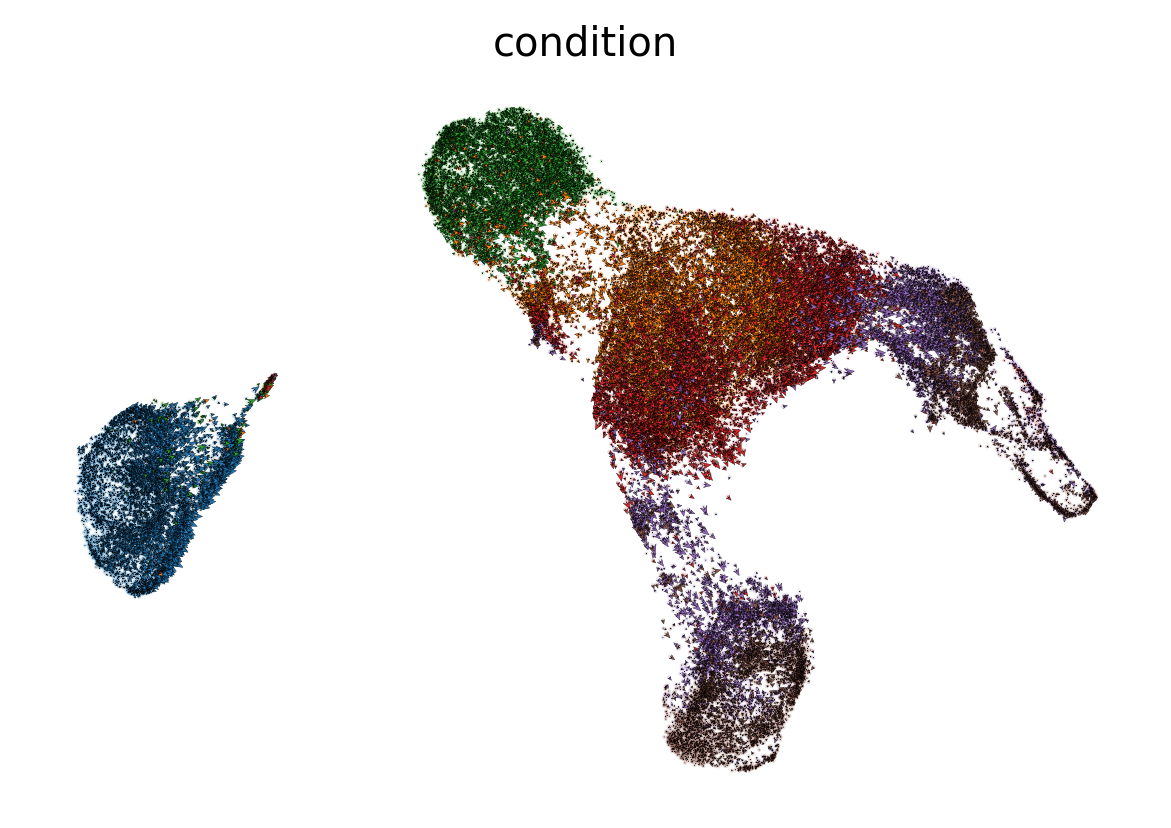

In [17]:
# scv.pl.velocity_embedding(adata, basis="umap", arrow_length=3, arrow_size=2, dpi=120, color = "condition")
# scv.pl.velocity_embedding(adata, basis='umap',color='cell.type.fine',arrow_length=5)
# scv.pl.velocity_embedding_grid(adata, basis='umap',color='seurat_clusters',arrow_length=5)

In [ ]:
#####latent time
#scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time',color_map='gnuplot', size=80)
scv.pl.scatter(adata, color=[ 'root_cells', 'end_points'])

In [ ]:
## start cellRank

In [9]:
# run cellRank 
# it did not work well, see issue in https://github.com/theislab/cellrank/issues/399
# cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0.2)

In [26]:
from cellrank.tl.kernels import VelocityKernel

vk = VelocityKernel(adata)

In [27]:
print(vk)

<VelocityKernel>


In [28]:
# Compute a transition matrix
vk.compute_transition_matrix()

Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/43187 [00:00<?, ?cell/s]

Setting `softmax_scale=7.6852`


  0%|          | 0/43187 [00:00<?, ?cell/s]

    Finish (0:02:35)


<VelocityKernel>

In [32]:
print(vk)

<VelocityKernel[softmax_scale=7.69, mode=deterministic, seed=44071, scheme=<CorrelationScheme>]>


In [33]:
# Combining two kernels
from cellrank.tl.kernels import ConnectivityKernel

ck = ConnectivityKernel(adata).compute_transition_matrix()

Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)


In [34]:
combined_kernel = 0.8 * vk + 0.2 * ck

In [35]:
print(combined_kernel)

((0.8 * <VelocityKernel[softmax_scale=7.69, mode=deterministic, seed=44071, scheme=<CorrelationScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))


In [36]:
# Initialize an estimator
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

GPCCA[n=43187, kernel=((0.8 * <VelocityKernel[softmax_scale=7.69, mode=deterministic, seed=44071, scheme=<CorrelationScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))]


In [ ]:
# Compute a matrix decomposition
g.compute_schur(n_components=20, method='brandts') # method with 'brandts', otherwise kernel will be killed; take really a long time for 40k cells 
g.plot_spectrum()

Computing Schur decomposition


In [ ]:
# save the matrix decomposition result
adata.write('../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/my_results_velocity_recover.dynamics.h5ad', compression="gzip")

Computing `3` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


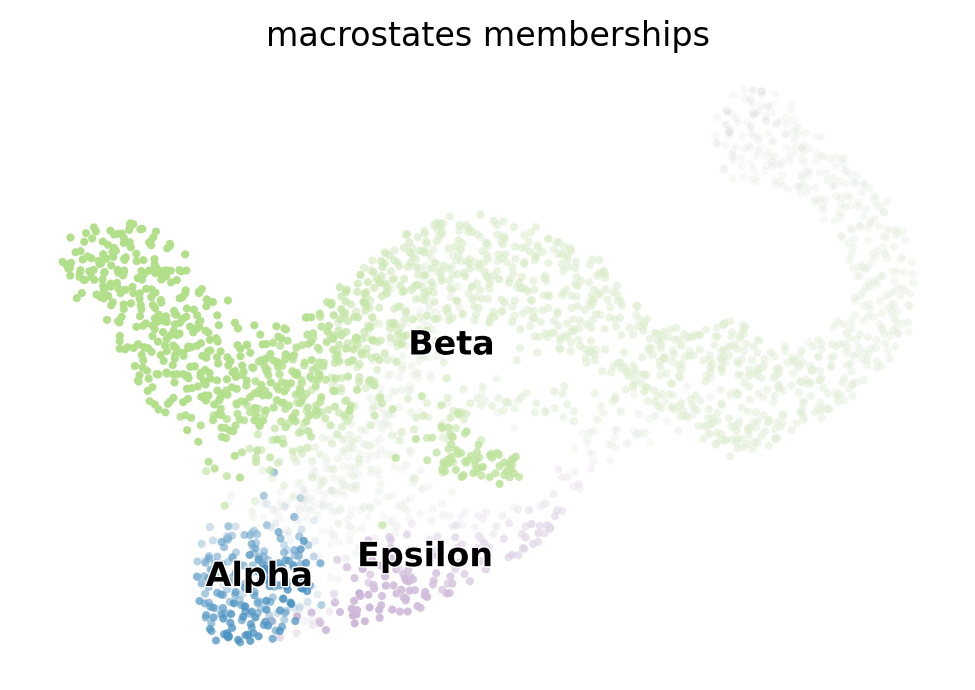

In [19]:
# Infer terminal states
g.compute_macrostates(n_states=3, cluster_key="clusters")
g.plot_macrostates()

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/cellrank.py3.9/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


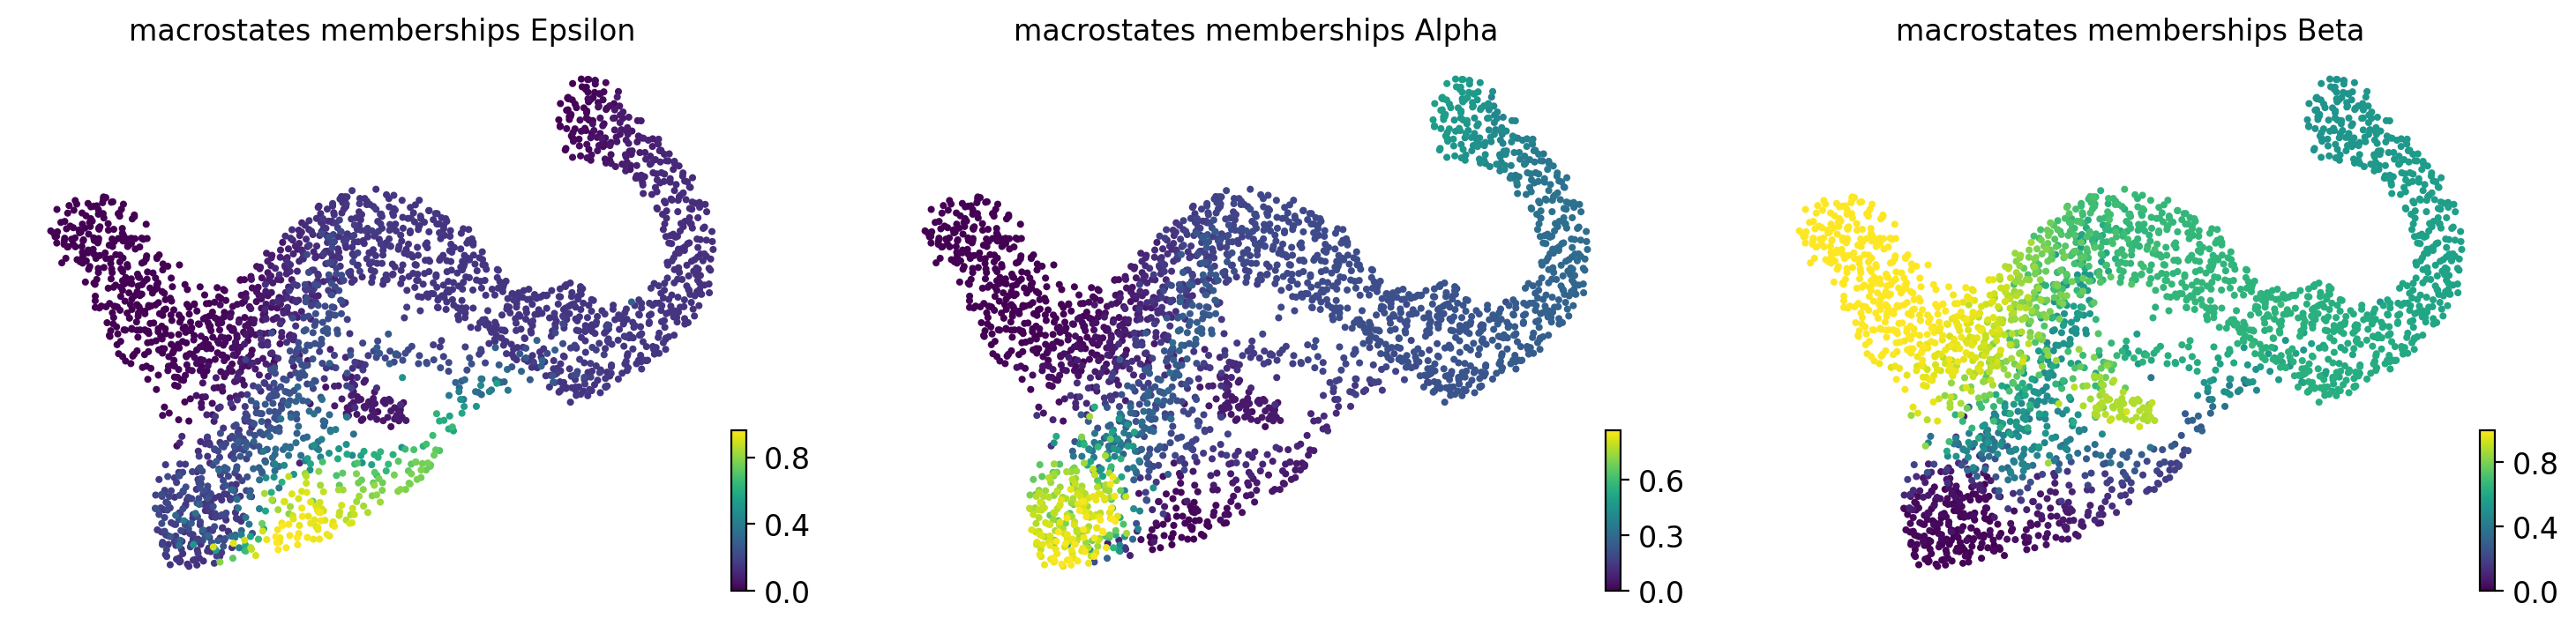

In [20]:
g.plot_macrostates(same_plot=False)

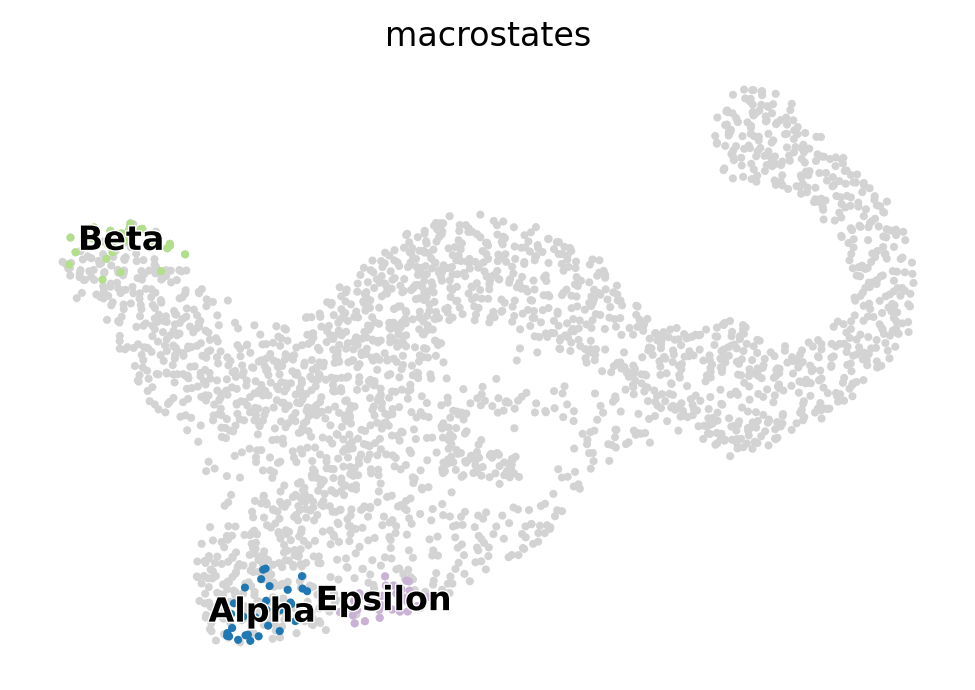

In [21]:
g.plot_macrostates(discrete=True)

In [22]:
g.compute_terminal_states()

Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


In [23]:
g.compute_absorption_probabilities(use_petsc = False) # don't use petsc because this dependency doesn't work


Computing absorption probabilities


100%|██████████| 3/3 [00:00<00:00, 28.30/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


In [24]:
adata

AnnData object with n_obs × n_vars = 2531 × 2000
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'clusters_gradients', 'terminal_states', 'terminal_states_probs'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'schur_matrix_fwd', 'eigendecomposition_fwd', 'coa

In [25]:
# find driver genes
alpha_drivers = g.compute_lineage_drivers(lineages="Alpha", return_drivers=True)
alpha_drivers.sort_values(by="Alpha_corr", ascending=False)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Alpha_corr     Alpha_pval     Alpha_qval  Alpha_ci_low  Alpha_ci_high
index                                                                         
Gcg        0.860515   0.000000e+00   0.000000e+00      0.850053       0.870298
Irx2       0.517187  3.359753e-182  3.359753e-179      0.488060       0.545163
Peg10      0.516978  5.076105e-182  3.384070e-179      0.487843       0.544963
Wnk3       0.478923  1.380206e-151  6.901032e-149      0.448327       0.508399
Tmsb15l    0.449982  3.624796e-131  1.449918e-128      0.418355       0.480520
...             ...            ...            ...           ...            ...
Nkx6-1    -0.318417   8.753704e-62   8.753704e-60     -0.352999      -0.282965
Nnat      -0.324287   3.462241e-64   4.073225e-62     -0.358716      -0.288976
Gng12     -0.330585   7.893811e-67   9.867264e-65     -0.364847      -0.295428
Pdx1      -0.332613   1.076867e-67   1.435823e-65     -0.366821      -0.297507
Ptma      -0.372928   2.138782e-86   3.888694e-84     -0.405991      -0.338890

[2000 rows x 5 columns]

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/cellrank.py3.9/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


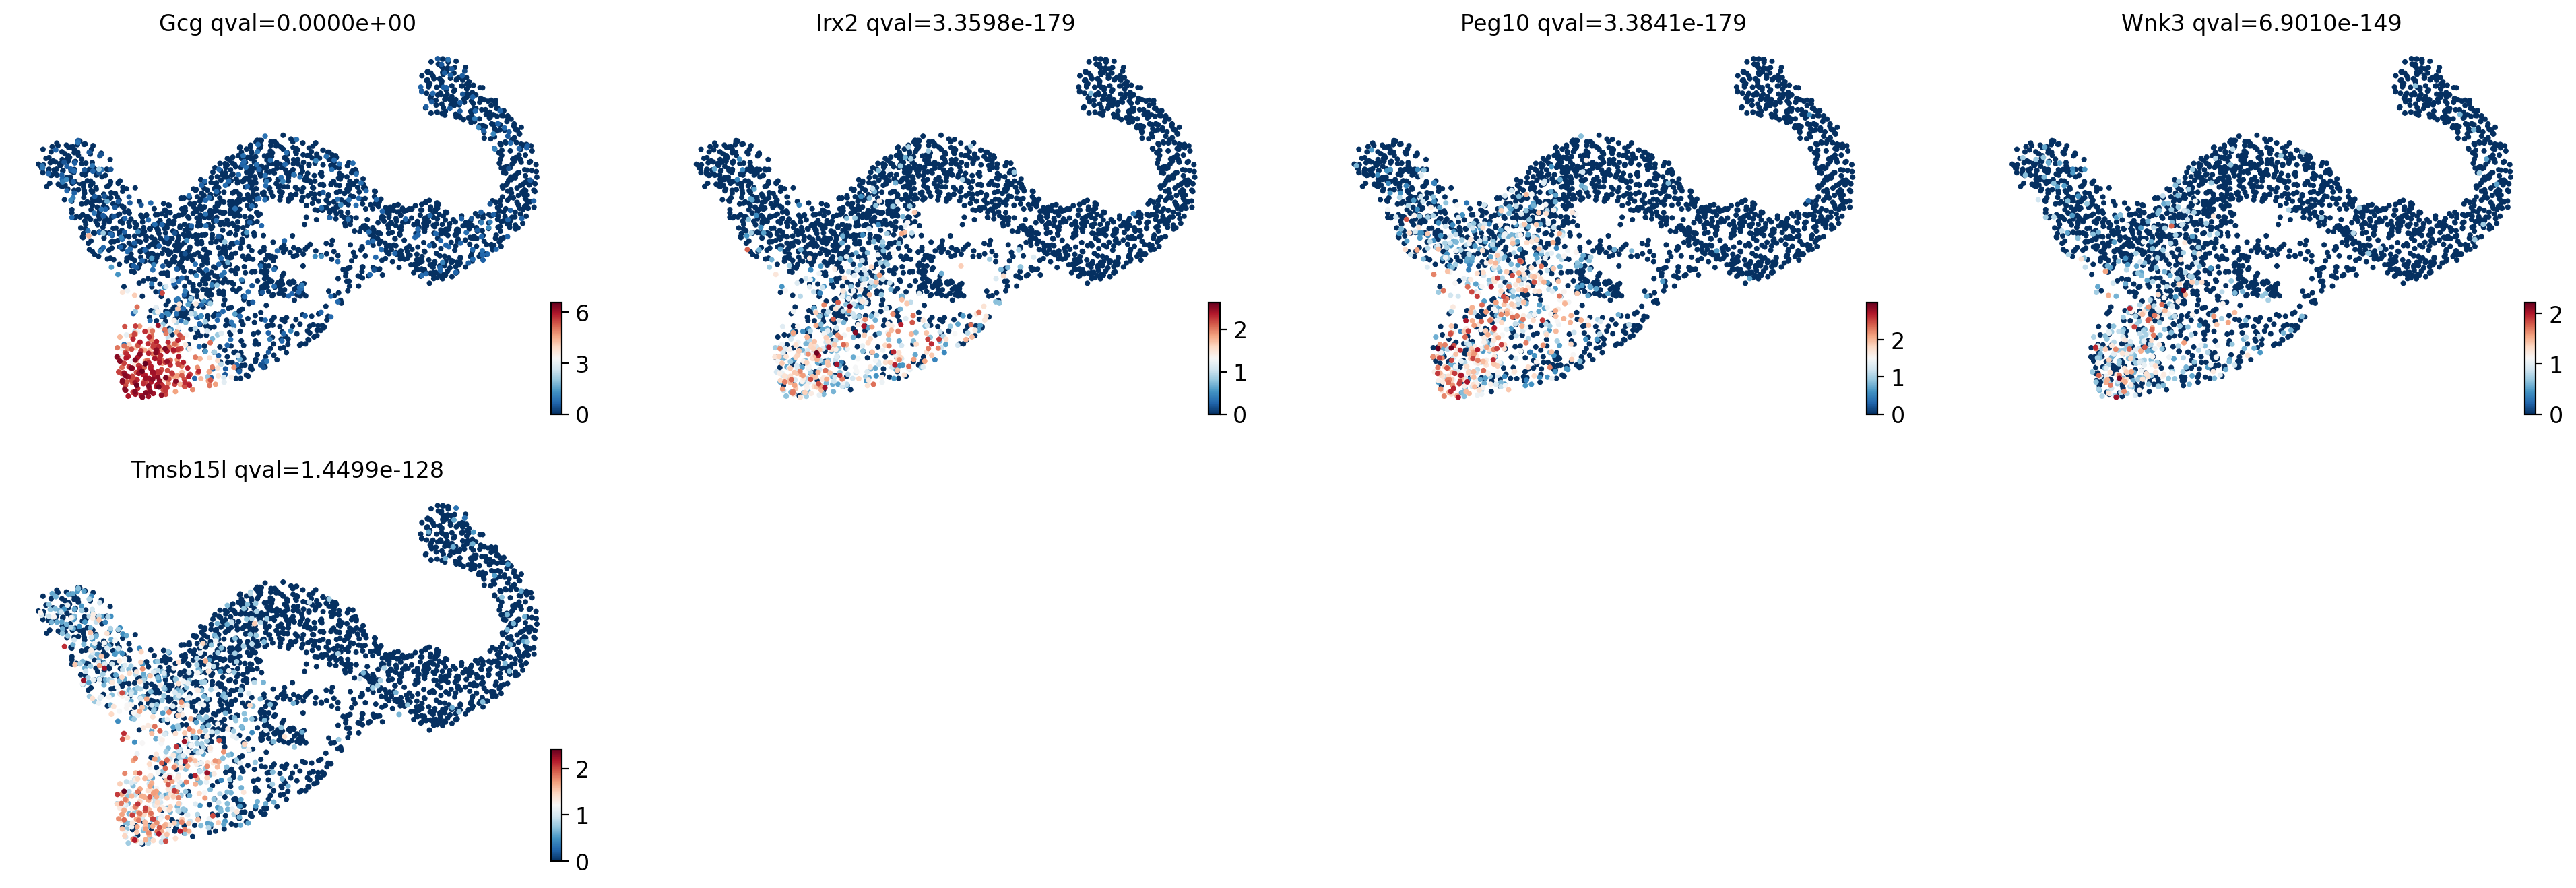

In [27]:
g.plot_lineage_drivers("Alpha", n_genes=5)

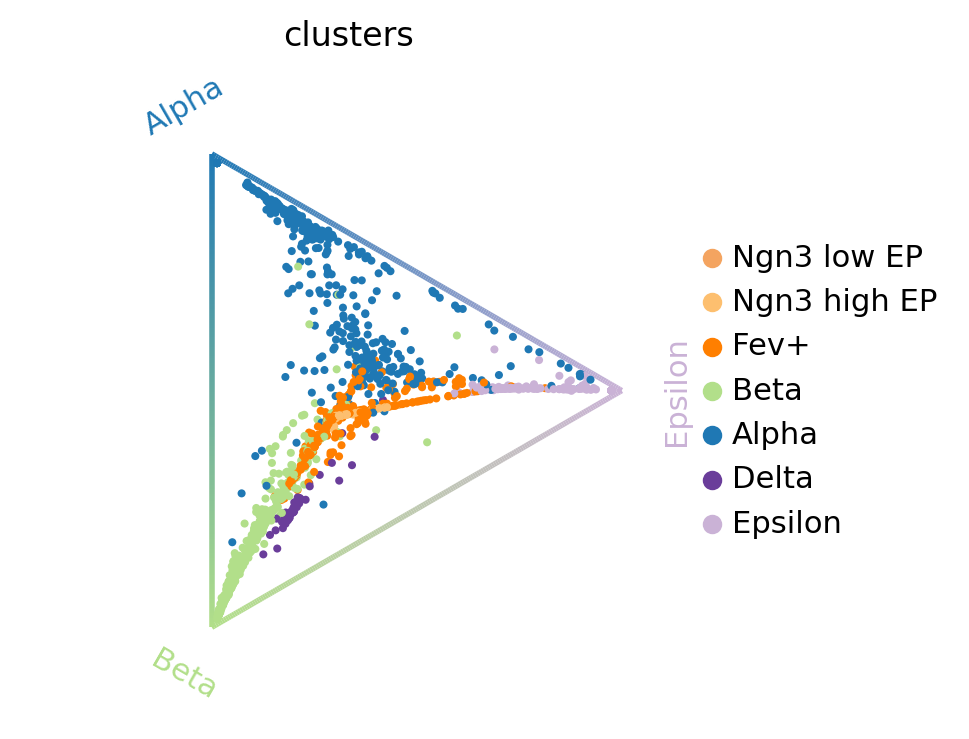

In [28]:
# Use a downstream plotting function
cr.pl.circular_projection(adata, keys="clusters", legend_loc="right")